In [15]:
import math
import matplotlib.pyplot as plt
from drawing import *
from num_methods import Solver2
from test_methods import Test2
from statistics import mean
import numpy as np

In [18]:
def fx(t, xvn, yvn, a, b, c):
    return -a*((xvn**3)/3-xvn) + a*yvn

def fy(t, xvn, yvn, a, b, c):
    return -xvn + c - b*yvn

$x' = -a(\frac{x^3}{3} - x) - ay$\
$y' = -x - by + c$\
$x(0) = 2,\quad y(0) = 0$\
Здесь 1 $\leq$ _a_ $\leq$ 10^3, 0 < _c_ < 1.
Провести исследование поведения решений в зависимости от значений «большого» параметра _a_.


In [20]:
# неявный 1
def jac1(T, xvn, yvn, t, table, k, a, b, c):
  def jac(x):
    return [[-a * (x[0] * x[1] + 2) * T - 1, (-a * x[0] * x[0] - 1) * T],
            [T * 1, T * 1 - 1]]
  return jac

def jac2(T, xvn, yvn, t, table, k, a, b, c):
    def jac(x):
      xn = [xvn + table.a[1][0] * k[0] + table.a[1][1] * x[0], xvn + table.a[1][0] * k[0] + table.a[1][1] * x[0]]
      yn = [yvn + table.a[1][0] * k[1] + table.a[1][1] * x[1], yvn + table.a[1][0] * k[1] + table.a[1][1] * x[1]]
      return [[-a * (2 * xn[0] * yn[0] * table.a[1][1] + 2 * table.a[1][1]) * T - 1,
               (-a * xn[0] * xn[0] - 1 * table.a[1][1]) * T],
              [T * 1 * table.a[1][1],
               T * 1 * table.a[1][1] - 1]]
    return jac

In [ ]:
t_start = 0
t_finish = 100
a = 1
b = 0.6

sol = Solver2((fx, fy), [jac1, jac2], [a, b, None], (2, 0), (t_start, t_finish))
for c in np.linspace(0.1, 1, 10):
     # c = 0.6
     sol.set_params([a, b, c])
     array = sol.do_method(sol.explicit1, 0.001, True)
     arrayx1 = [i[0] for i in array[1]]
     arrayy1 = [i[1] for i in array[1]]
     if round(mean(arrayx1[-100:]), 3) == round(mean(arrayx1[-200:]), 3):
          print("c: ", c)
          print("x: ", mean(arrayx1[-100:]))
          print("y: ", mean(arrayy1[-100:]))
          print()
     # main_array.append(arrayx3)
     # print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
     # array_dif_x3 = [[i[0] for i in array3_dif]]
     draw([arrayy1],
          [arrayx1],
          ["y", "x"], ["a"])
     # draw([[i[0] for i in array2[2]]], [arrayx2], ["x' from x"])

/home/eva012/projectPractice/src/drawing.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


c:  1.0
x:  1.328268855668525
y:  -0.5471147594476335



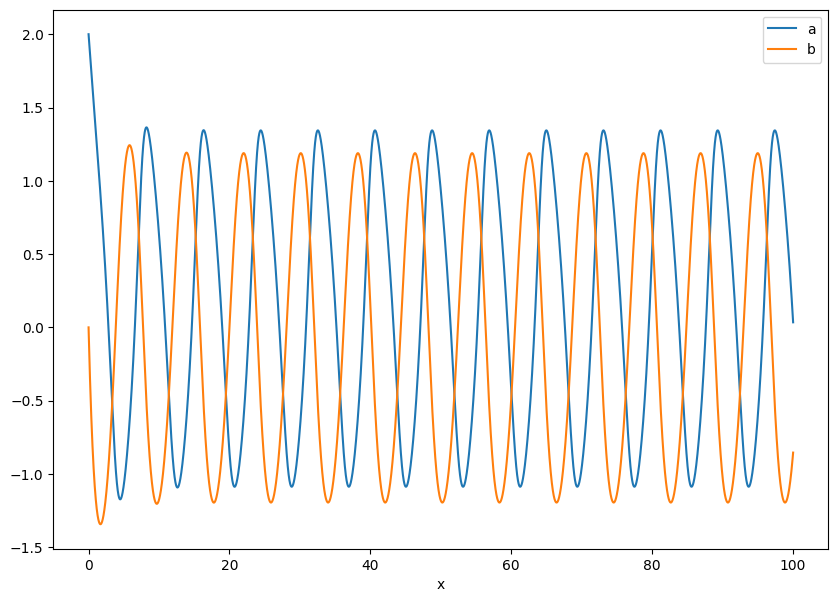

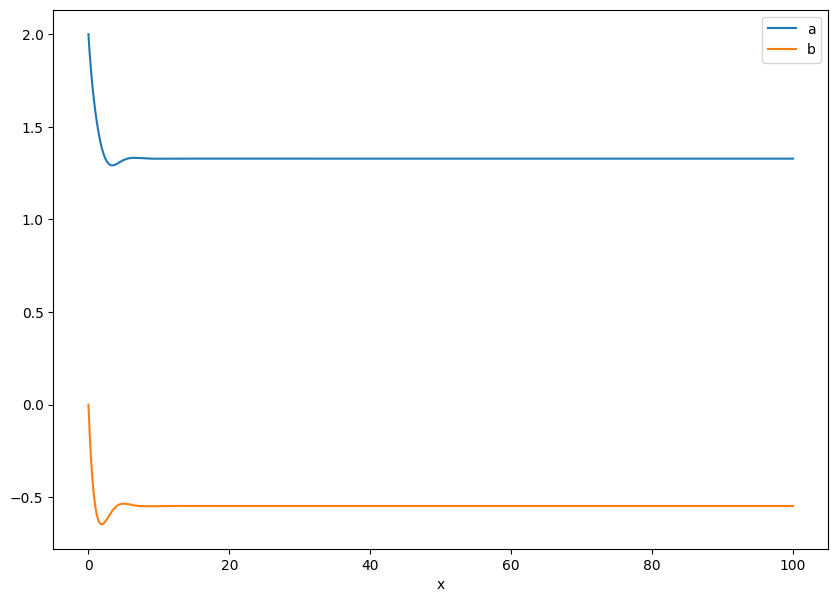

In [21]:
for c in np.linspace(0.1, 1, 10):
     # c = 0.6
     sol.set_params([a, b, c])
     array = sol.do_method(sol.explicit1, 0.001, True)
     arrayx1 = [i[0] for i in array[1]]
     arrayy1 = [i[1] for i in array[1]]
     if round(mean(arrayx1[-100:]), 3) == round(mean(arrayx1[-200:]), 3):
          print("c: ", c)
          print("x: ", mean(arrayx1[-100:]))
          print("y: ", mean(arrayy1[-100:]))
          print()
     # main_array.append(arrayx3)
     # print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
     # array_dif_x3 = [[i[0] for i in array3_dif]]
     draw([array[0], array[0]],
          [arrayx1, arrayy1],
          ["t", "x"], ["a", "b"])
     # draw([[i[0] for i in array2[2]]], [arrayx2], ["x' from x"])

### Сравнение с решением с помощью SciPy


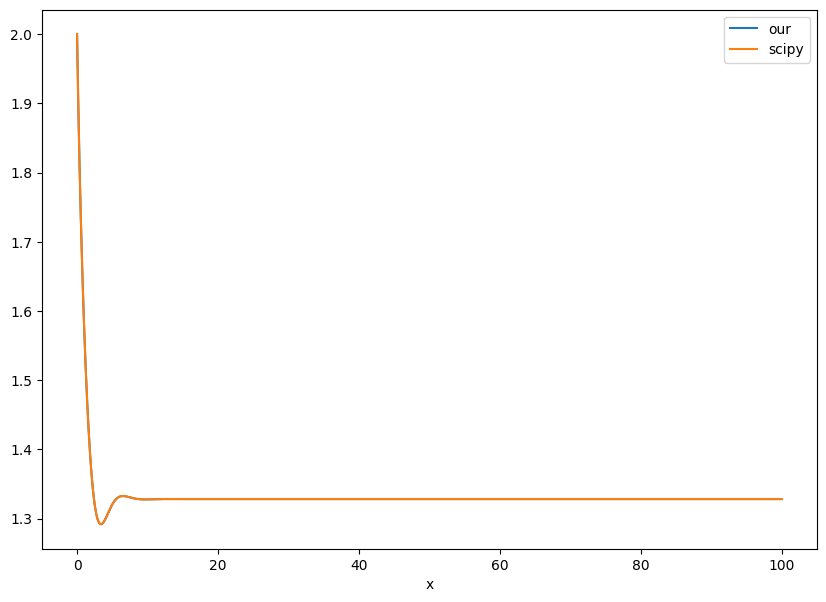

In [22]:
from scipy.integrate import ode

def f(t, y, a, b, c):
  return [a*(y[0] + y[1] - y[0]**3/3),
          c - y[0] - b*y[1]]

def jac(t, y, a, b, c):
  return [[a*(1 - y[0]**2),  a],
          [             -1, -b]]

y01, y02 = 2., 0.
r = ode(f, jac).set_integrator('vode', method='adams', with_jacobian=True)
r.set_initial_value((y01, y02)).set_f_params(a, b, c).set_jac_params(a, b, c)

t1, dt, t, y1, y2 = t_finish, 0.001, [0.], [y01], [y02]
while r.successful() and r.t < t1:
  r.integrate(r.t + dt)
  t.append(r.t)
  y1.append(r.y[0])
  y2.append(r.y[1])

array = sol.do_method(sol.implicit2, 0.001)
draw([array[0], t],
     [[i[0] for i in array[1]], y1],
      ["t", "x"],
      ["our", "scipy"])

Веселые рисунки


AttributeError: 'Solver2' object has no attribute 'explicit1_method'

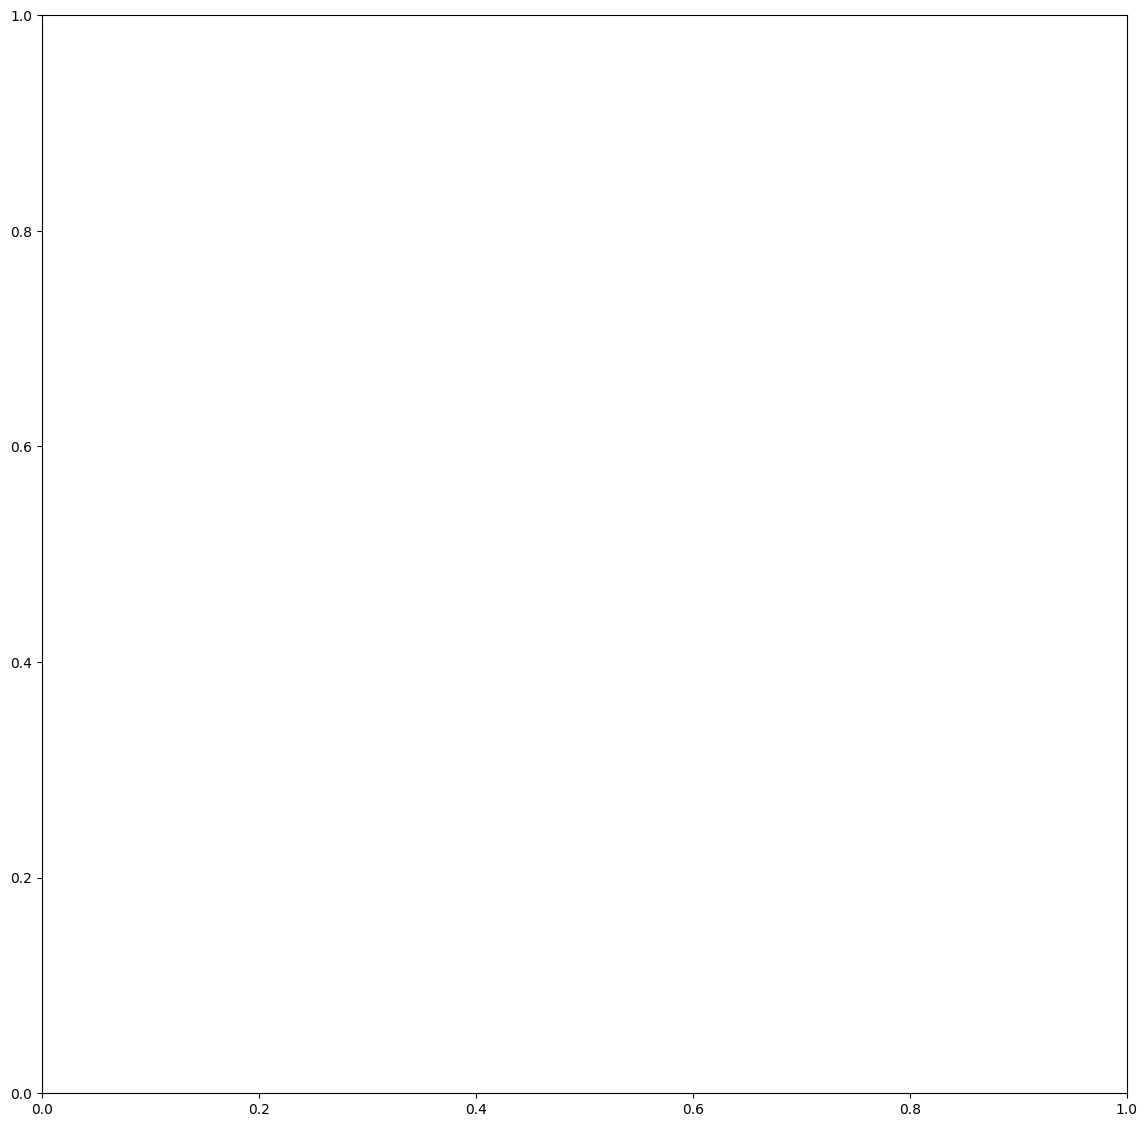

In [23]:
T = 0.01
t_start = 0
t_finish = 40
a = 1
# fig1 = plt.figure(figsize=(10,18))
# px1 = fig1.add_subplot(111)
# fig2 = plt.figure(figsize=(14, 14))
# px2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(14, 14))
px3 = fig3.add_subplot(111)
a = 8
while a <= 8:
    c = 0.5
    b = 0.60
    # Первый элемент это x, второй y
    variables = (T, a, b, c)
    array0 = [(2, 0)]
    array1 = sol.do_method(sol.explicit1_method, T, False)
    array2 = do_method(implicit_method, t_start, t_finish, [t_start], [(-1, 0)], variables)

    arrayx1 = [i[0] for i in array1[1]]
    arrayx2 = [i[0] for i in array2[1]]

    # main_array.append(arrayx3)
    # print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
    # array_dif_x3 = [[i[0] for i in array3_dif]]
    # draw([array1[0], array2[0]],
    #     [arrayx1, arrayx2],
    #     [f"явный 1-го порядка {len(array1[0])}", f"неявный 2го"])
    # draw_on_plot([arrayx2], [[i[0] for i in array2[2]]], [f"{round(a, 3)} value"], px1)
    # draw([[i[0] for i in array2[2]]], [arrayx2], [f"{a} value"])
    # draw_on_plot([[i[1] for i in array2[1]]], [[i[1] for i in array2[2]]], [f"{round(a, 3)} value"], px2)
    draw_on_plot([arrayx2], [[i[1] for i in array2[1]]], [f"a value: {round(a, 3)}"], px3)
    a *= 1.2
# px1.legend(loc='upper left')
# px2.legend(loc='upper left')
px3.legend(loc='upper left')

In [ ]:
T = 0.01
t_start = 0
t_finish = 40
a = 1
fig1 = plt.figure(figsize=(8,8))
px1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(8, 8))
px2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(14, 14))
px3 = fig3.add_subplot(111)
while a <= 32:
    c = 0.4
    b = 0.60
    # Первый элемент это x, второй y
    variables = (T, a, b, c)
    array0 = [(2, 0)]
    array1 = sol.do_method(sol.explicit1_method, T, False)
    array2 = do_method(implicit_method, t_start, t_finish, [t_start], [(2, 0)], variables)

    arrayx1 = [i[0] for i in array1[1]]
    arrayx2 = [i[0] for i in array2[1]]
    arrayy2 = [i[1] for i in array2[1]]
    # main_array.append(arrayx3)
    # print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
    # array_dif_x3 = [[i[0] for i in array3_dif]]
    # draw([array1[0], array2[0]],
    #     [arrayx1, arrayx2],
    #     [f"явный 1-го порядка {len(array1[0])}", f"неявный 2го"])
    draw_on_plot([array2[0]], [arrayx2], [f"a = {round(a, 3)}"], px1)
    draw_on_plot([array2[0]], [arrayy2], [f"a = {round(a, 3)}"], px2)
    # draw([[i[0] for i in array2[2]]], [arrayx2], [f"{a} value"])
    # draw_on_plot([[i[1] for i in array2[1]]], [[i[1] for i in array2[2]]], [f"{round(a, 3)} value"], px2)
    # draw_on_plot([arrayx2], [[i[1] for i in array2[1]]], [f"a value: {round(a, 3)}"], px3)
    a *= 3
ls = 15
fs = 6
fonts = 15
px1.tick_params(axis="both", which="major", labelsize=ls)
px1.set_xlabel("t", fontsize = fonts)
px1.set_ylabel("X", fontsize = fonts)
px1.legend(fontsize=fonts-3)
px2.tick_params(axis="both", which="major", labelsize=ls)
px2.set_xlabel("t", fontsize = fonts)
px2.set_ylabel("Y", fontsize = fonts)
px2.legend(fontsize=fonts-3)
px1.legend(loc='upper left')
px2.legend(loc='upper left')
px3.legend(loc='upper left')

In [ ]:
T = 0.001
t_start = 0
t_finish = 40
a = 1
fig1 = plt.figure(figsize=(8,8))
px1 = fig1.add_subplot(111)
fig2 = plt.figure(figsize=(8, 8))
px2 = fig2.add_subplot(111)
fig3 = plt.figure(figsize=(14, 14))
px3 = fig3.add_subplot(111)
a = 10
c = 0.5
b = 0.60
# Первый элемент это x, второй y
variables = (T, a, b, c)
array0 = [(2, 0)]
array1 = sol.do_method(sol.explicit1_method, T, False)
array2 = do_method(implicit_method, t_start, t_finish, [t_start], [(2, 0)], variables)
array3 = sol.do_method(sol.explicit4_method, T, False)
array4 = sol.do_method(sol.explicit5_method, T, False)
arrayx1 = [i[0] for i in array1[1]]
arrayx2 = [i[0] for i in array2[1]]
arrayy2 = [i[1] for i in array2[1]]
# main_array.append(arrayx3)
# print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
# array_dif_x3 = [[i[0] for i in array3_dif]]
# draw([array1[0], array2[0]],
#     [arrayx1, arrayx2],
#     [f"явный 1-го порядка {len(array1[0])}", f"неявный 2го"])
draw_on_plot([array2[0]], [arrayx2], ["Неявный второго порядка"], px1)
draw_on_plot([array3[0]], [[i[0] for i in array3[1]]], [f"Явный четвертого порядка"], px1)
draw_on_plot([array4[0]], [[i[0] for i in array4[1]]], [f"Явный пятого порядка"], px1)
# draw([[i[0] for i in array2[2]]], [arrayx2], [f"{a} value"])
# draw_on_plot([[i[1] for i in array2[1]]], [[i[1] for i in array2[2]]], [f"{round(a, 3)} value"], px2)
# draw_on_plot([arrayx2], [[i[1] for i in array2[1]]], [f"a value: {round(a, 3)}"], px3)
a *= 3
ls = 15
fs = 6
fonts = 15
px1.tick_params(axis="both", which="major", labelsize=ls)
px1.set_xlabel("t", fontsize = fonts)
px1.set_ylabel("X", fontsize = fonts)
px1.legend(fontsize=fonts-3)
px2.tick_params(axis="both", which="major", labelsize=ls)
px2.set_xlabel("t", fontsize = fonts)
px2.set_ylabel("Y", fontsize = fonts)
px2.legend(fontsize=fonts-3)
px1.legend(loc='upper left')
px2.legend(loc='upper left')
px3.legend(loc='upper left')